In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation , Conv2D, MaxPooling2D, Flatten ,BatchNormalization
from keras.datasets import cifar10

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
train_images.shape , test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

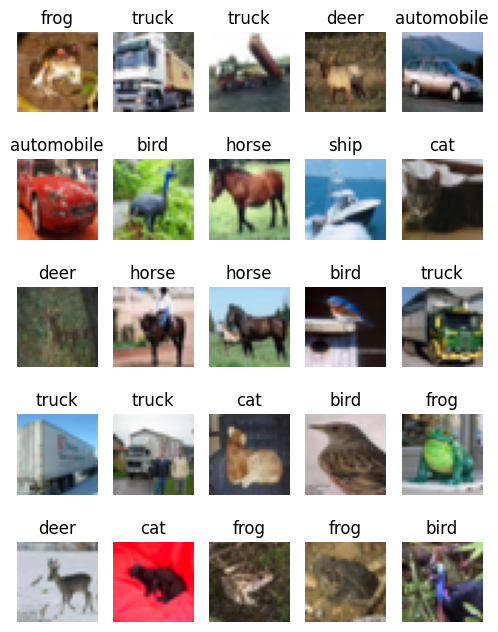

In [5]:
plt.figure(figsize=(6,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(train_images[i])
    plt.title(labels[train_labels[i][0]])

In [6]:
train_ds  = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [7]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [8]:
test_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [9]:
def process_images(image, label):
  image = tf.image.per_image_standardization(image)
  image = tf.image.resize(image, [64,64])
  return image, label

In [10]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
print('Train size', train_ds_size)
print('Test size', test_ds_size)

Train size 50000
Test size 10000


In [11]:
train_ds = (train_ds.map(process_images).shuffle(buffer_size=train_ds_size).batch(batch_size=32,drop_remainder=True))
test_ds = (test_ds.map(process_images).shuffle(buffer_size=test_ds_size).batch(batch_size=32,drop_remainder=True))

In [12]:
### Create AlexNet Architecture

In [13]:
model = Sequential(
    [Conv2D(filters=128 , kernel_size = (11,11) , strides=(4,4) , activation = 'relu' , input_shape = (64,64,3)),
     BatchNormalization(),
     MaxPooling2D(pool_size=(2,2)),
     Conv2D(filters=256 , kernel_size = (5,5) , strides=(1,1) , activation = 'relu' , padding='same'),
     BatchNormalization(),
     MaxPooling2D(pool_size=(3,3)),
     Conv2D(filters=256 , kernel_size = (3,3) , strides=(1,1) , activation = 'relu' , padding='same'),
     BatchNormalization(),
     Conv2D(filters=256 , kernel_size = (1,1) , strides=(1,1) , activation = 'relu' , padding='same'),
     BatchNormalization(),
     Conv2D(filters=256 , kernel_size = (1,1) , strides=(1,1) , activation = 'relu' , padding='same'),
     BatchNormalization(),
     MaxPooling2D(pool_size=(2,2)),
     Flatten(),
     Dense(units=1024 , activation='relu'),
     Dropout(0.5),
     Dense(units=1024 , activation='relu'),
     Dropout(0.5),
     Dense(units=10 , activation='softmax')
     ]
)

In [14]:
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_ds, epochs=30, validation_data=test_ds)

Epoch 1/30
1562/1562 [==============================] - 49s 11ms/step - loss: 2.1069 - accuracy: 0.2559 - val_loss: 1.6002 - val_accuracy: 0.4296
Epoch 2/30
1562/1562 [==============================] - 20s 10ms/step - loss: 1.6995 - accuracy: 0.3855 - val_loss: 1.4233 - val_accuracy: 0.4943
Epoch 3/30
1562/1562 [==============================] - 20s 9ms/step - loss: 1.5183 - accuracy: 0.4523 - val_loss: 1.3146 - val_accuracy: 0.5256
Epoch 4/30
1562/1562 [==============================] - 18s 9ms/step - loss: 1.3944 - accuracy: 0.4976 - val_loss: 1.2401 - val_accuracy: 0.5550
Epoch 5/30
1562/1562 [==============================] - 21s 9ms/step - loss: 1.2969 - accuracy: 0.5381 - val_loss: 1.1709 - val_accuracy: 0.5866
Epoch 6/30
1562/1562 [==============================] - 18s 10ms/step - loss: 1.2135 - accuracy: 0.5708 - val_loss: 1.1165 - val_accuracy: 0.6035
Epoch 7/30
1562/1562 [==============================] - 20s 10ms/step - loss: 1.1369 - accuracy: 0.5971 - val_loss: 1.0679 - va

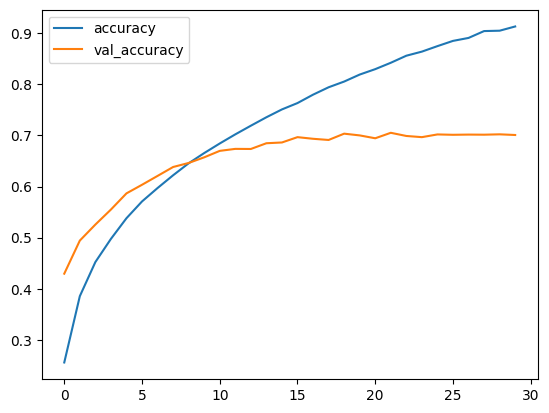

In [20]:
plt.plot(history.history['accuracy'] , label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()